In [1]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


8


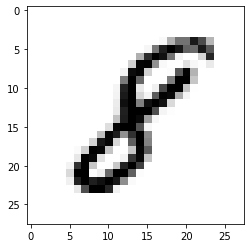

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28)
Number of images in x_train 60000
Number of images in x_test 10000


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

# Overkill - This model will get above 97% accuracy for test set (longer to train)
# model = Sequential()
# model.add(Flatten())
# model.add(Dense(256, activation="relu"))
# model.add(Dense(512, activation="relu"))
# model.add(Dropout(0.2))
# model.add(Dense(128, activation="relu"))
# model.add(Dense(10, activation="softmax"))

# This is a much simpler model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(10, activation="softmax"))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 5)                 3925      
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x=x_train,
            y=y_train,
            epochs=20,
            validation_data=(x_test, y_test),
            )

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4109 - accuracy: 0.6346 - val_loss: 0.9799 - val_accuracy: 0.7428
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8297 - accuracy: 0.7746 - val_loss: 0.7127 - val_accuracy: 0.8009
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6509 - accuracy: 0.8156 - val_loss: 0.6026 - val_accuracy: 0.8214
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5702 - accuracy: 0.8307 - val_loss: 0.5519 - val_accuracy: 0.8310
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5245 - accuracy: 0.8446 - val_loss: 0.5190 - val_accuracy: 0.8482
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4912 - accuracy: 0.8614 - val_loss: 0.4907 - val_accuracy: 0.8676
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4643 - accuracy: 0.8740 - val_loss: 0.4714 - val_accuracy:

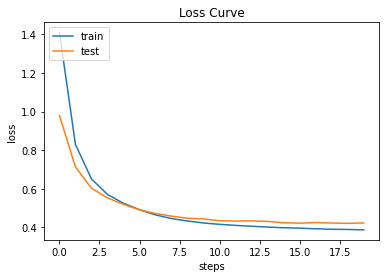

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Curve')
plt.ylabel('loss')
plt.xlabel('steps')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

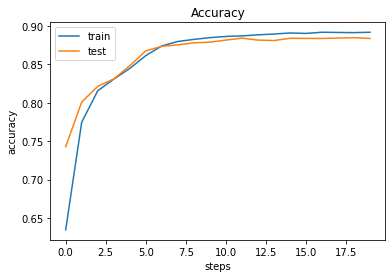

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('steps')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 5)                 3925      
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


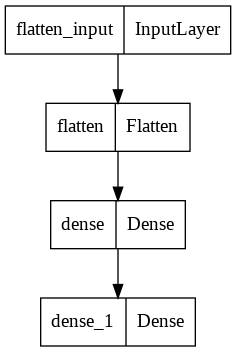

In [11]:
import tensorflow as tf
tf.keras.utils.plot_model(model)

In [12]:
weights = []
for layer in model.layers:
    weights.append(list(layer.weights))

In [16]:
d1_W = weights[1]
d2_W = weights[2]
# d3_W = weights[4]
# d4_W = weights[5]

first output is weights and the second one is biases

In [17]:
print("Desnse 1 weight dimensions: ", d1_W[0].shape)
print()
print("Desnse 2 weight dimensions: ", d2_W[0].shape)
print()
# print("Desnse 3 weight dimensions: ", d3_W[0].shape)
# print()
# print("Desnse 4 weight dimensions: ", d4_W[0].shape)
# print()

Desnse 1 weight dimensions:  (784, 5)

Desnse 2 weight dimensions:  (5, 10)



In [18]:
d1_W[0][:, 0]

<tf.Tensor: shape=(784,), dtype=float32, numpy=
array([ 1.87747255e-02,  2.92847455e-02, -2.20142305e-03,  9.93192196e-03,
       -6.68144301e-02,  1.51031837e-02, -2.85172835e-02, -7.21493810e-02,
       -8.35852474e-02,  7.68105686e-03,  6.99596852e-02, -1.45032182e-02,
       -2.41862744e-01, -2.53583103e-01,  9.20066610e-02, -2.40950193e-02,
        7.55921006e-04,  2.76185051e-02,  8.23017657e-02, -6.24083579e-02,
       -2.65618414e-02, -6.19563833e-02,  8.05243999e-02, -6.99588731e-02,
        4.07440215e-02, -6.44783005e-02,  1.67775899e-03, -2.72103772e-02,
       -5.65914884e-02, -8.55338722e-02,  6.50706887e-03, -5.42950630e-03,
        3.36040370e-02,  4.06061023e-01,  9.36115384e-01,  1.02769005e+00,
        8.37210536e-01,  1.02212310e+00,  7.42349803e-01,  1.30009568e+00,
        1.27679455e+00,  1.06982899e+00,  1.44201994e-01,  7.28241920e-01,
        1.07709813e+00,  6.41773701e-01,  6.39384091e-01,  8.98441851e-01,
        9.51999009e-01,  8.62173140e-01,  1.00334907